In [20]:
from matplotlib import pyplot as plt
from matplotlib.colors import Colormap
import numpy as np
import math
from scipy import stats

path = '/home/lea/Dokumente/FSU/Anwendungspraktikum/Videos/GoPro/GoProFrames'
coords = []
time = []
with open('/home/lea/Dokumente/FSU/Anwendungspraktikum/points.txt', 'r') as f:
    i = 0
    for row in f:
        i += 1
        for coord in row.split('; '):
            x,y = coord[1:-1].split(', ')
            coords.append([int(x), int(y)])
            time.append(i)

f = 18 #first f values represent court
court = np.array(coords)
coords = np.array(coords[18:])


### angular between two points

In [21]:
#calculate line through two points
def l(p1,p2):
    return p2-p1

#calulate angular between two lines
def angular(r1, r2): # r1, r2 direction vectors of line
    alphaRad = math.acos(abs(np.dot(r1, r2)) / (np.linalg.norm(r1) * np.linalg.norm(r2)))
    alpha = math.degrees(alphaRad)
    return alpha

In [22]:
cp = np.zeros(len(coords))
for i in range(len(coords)-2):
    if np.any(l(coords[i], coords[i+1])) > 0 and np.any(l(coords[i+1], coords[i+2])) > 0: #make sure not to divide by zero
        alpha = angular(l(coords[i], coords[i+1]), l(coords[i+1], coords[i+2]))
        if alpha > 30:
            cp[i+1] = 1
    else: # ball did not move in image
        pass
print(cp)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.]


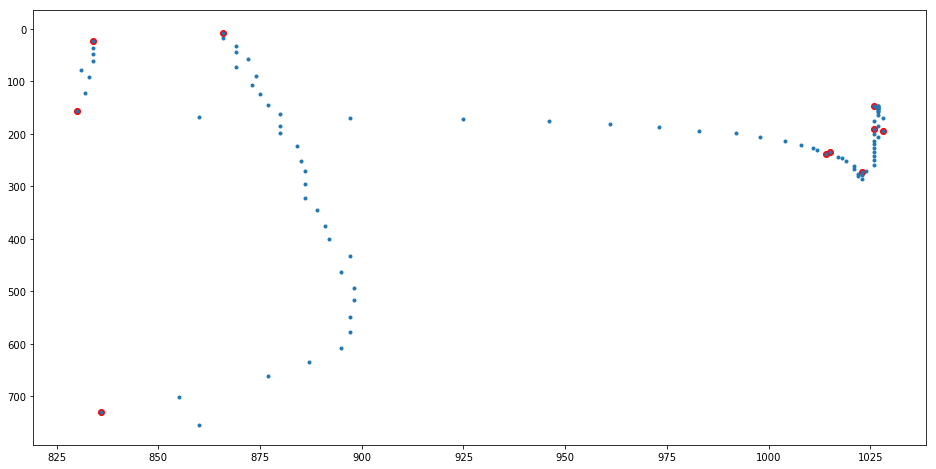

In [18]:
#plt.plot(court[:18,0], court[:18,1], 'r')
plt.figure(figsize=(16,8))
plt.plot(coords[:,0], coords[:,1],'.')
for i in range(len(cp)):
    if cp[int(i)] == 1:
        plt.scatter(coords[int(i),0], coords[int(i),1], c='r')
plt.gca().invert_yaxis()
#plt.scatter(coords[:,0], cp)
plt.show()

### Liner fit to improve search

In [23]:
len(coords)

94

In [30]:
std_err = np.zeros(1)
sum(std_err)

1.0

In [28]:
pv = [int(x) for x in np.linspace(0,len(coords),10)]
std_err = np.ones(len(pv)-1)
s = np.zeros(len(pv)-1)
i = np.zeros(len(pv)-1)
thres = 0.2
err = sum(std_err) / [len(pv)-1]
while err > thres:
    for i in range(len(pv))-1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(coords[pv[i]:pv[i+1]])
        std_err[i] = std_err
        s[i] = slope
        i[i] = intercept
        if std_err > 0.2
            max_dist = np.argmax(abs(coords[pv[i]:pv[i+1],1]-(intercept+slope*coords[pv[i]:pv[i+1],0])))
            if max_dist == 0:
                pv[i] += 1 
            elif max_dist == len(coords[pv[i]:pv[i+1]):
                pv[i+1] -= 1
            else:
                ind = index von pv[i]
                np.insert(pv,ind+max_dist, pv[i]+max_dist) #ToDo
                
    
    err = sum(std_err) / [len(pv)-1]
    print(err)

[0, 10, 20, 31, 41, 52, 62, 73, 83, 94]


In [ ]:
u = np.array(0) #starting points regression
k = np.array(3) #end points regression

if std_err > 1: u += 1
    k += 1
    slope, intercept, r_value, p_value, std_err = stats.linregress(coords[u:k])
    if std_err > std_old:
        # save values and points
        # redo regression
        plt.figure(figsize=(16,8))
        plt.plot(coords[u:k,0], coords[u:k,1],'.')
        x = [min(coords[u:k,0]), max(coords[u:k,0])]
        y = [intercept + slope*val for val in x]
        print(x,y,std_err)
        plt.plot(x,y,'r-')
        plt.gca().invert_yaxis()
        #plt.scatter(coords[:,0], cp)
        plt.show()
        std_old = std_err